In [325]:
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt

import re

# Load the data
gm = gpd.read_parquet('data/gemeenten/gemeenten_stats.parquet')
gm_c = pd.read_parquet('data/gemeenten/gemeenten_counts.parquet')

wk = gpd.read_parquet('data/wijken/wijken_stats.parquet')
wk_c = pd.read_parquet('data/wijken/wijken_counts.parquet')

bu = gpd.read_parquet('data/buurten/buurten_stats.parquet')
bu_c = pd.read_parquet('data/buurten/buurten_counts.parquet')

gm = gm.merge(gm_c, left_index=True, right_index=True)
wk = wk.merge(wk_c, left_index=True, right_index=True)
bu = bu.merge(bu_c, left_index=True, right_index=True)

categorisation = pd.read_excel('data/categorisation.xlsx')

bu

,buurtcode,buurtnaam,wijkcode,gemeentecode_x,gemeentenaam,IND_WBI,H2O,POSTCODE,DEK_PERC,OAD,...,L0_2_count_Bars and cafes,L0_2_count_Stands and takeaway,"L0_2_count_Bus, tram and metro",L0_2_count_Public transport,L0_2_count_Cycling,L0_2_count_Services,L0_2_count_Fuel and charge,L0_2_count_Parking,L0_2_count_Train,L0_2_count_Waste management
0,BU00140000,Binnenstad-Noord,WK001400,GM0014,Groningen,1.0,NEE,9712,1.0,6865.0,...,50.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BU00140001,Binnenstad-Zuid,WK001400,GM0014,Groningen,1.0,NEE,9711,1.0,6586.0,...,99.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BU00140002,Binnenstad-Oost,WK001400,GM0014,Groningen,1.0,NEE,9711,3.0,6264.0,...,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BU00140003,Binnenstad-West,WK001400,GM0014,Groningen,1.0,NEE,9718,1.0,6576.0,...,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BU00140004,Noorderplantsoen,WK001400,GM0014,Groningen,1.0,NEE,9717,2.0,6447.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13938,BU19923200,Zwartewaal,WK199232,GM1992,Voorne aan Zee,2.0,NEE,3238,1.0,281.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13939,BU19923201,Tuindorp-Hofstede,WK199232,GM1992,Voorne aan Zee,2.0,NEE,3238,3.0,284.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13940,BU19923202,Zalmlaan,WK199232,GM1992,Voorne aan Zee,2.0,NEE,3238,1.0,278.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13941,BU19923209,Verspreide huizen,WK199232,GM1992,Voorne aan Zee,2.0,NEE,3238,1.0,95.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [326]:
maincats = set(categorisation['L0 category'].values)

countdict = {cat : [] for cat in maincats}
countdict

{'Waste management': [],
 'Sustenance': [],
 'Shopping': [],
 'Sports': [],
 'Private transportation': [],
 'Public transportation': [],
 'Public service': [],
 'Facilities': [],
 'Healthcare': [],
 'Education': [],
 'Places of worship': [],
 'Entertainment, arts and culture': [],
 'Financial': []}

In [327]:
import plotly_express as px
px.data.tips()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [441]:
L0_counts_gm = list(gm.filter(regex='L1_0_count_').columns.values)
L0_counts_wk = list(wk.filter(regex='L0_0_count_').columns.values)
L0_counts_bu = list(bu.filter(regex='L1_0_count_').columns.values)
gm_ = gm[L0_counts_gm]
wk_ = wk[L0_counts_wk]
bu_ = bu[L0_counts_bu]
gm_ = gm_.rename(columns={col : re.sub('L1_\d_count_', '', col) for col in L0_counts_gm})
wk_ = wk_.rename(columns={col : re.sub('L0_\d_count_', '', col) for col in L0_counts_wk})
bu_ = bu_.rename(columns={col : re.sub('L1_\d_count_', '', col) for col in L0_counts_bu})

gm_.loc[:, 'type'] = 'municipality'
wk_.loc[:, 'type'] = 'district'
bu_.loc[:, 'type'] = 'neighbourhood'

cols = list(gm_.columns)[:-3]


# # append all dataframes
df = pd.concat([wk_, bu_, gm_])
# df = wk_

# cols = [col for col in cols if col in wk_.columns]



C:\Users\joepl\AppData\Local\Temp\ipykernel_25696\1025068821.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.

C:\Users\joepl\AppData\Local\Temp\ipykernel_25696\1025068821.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



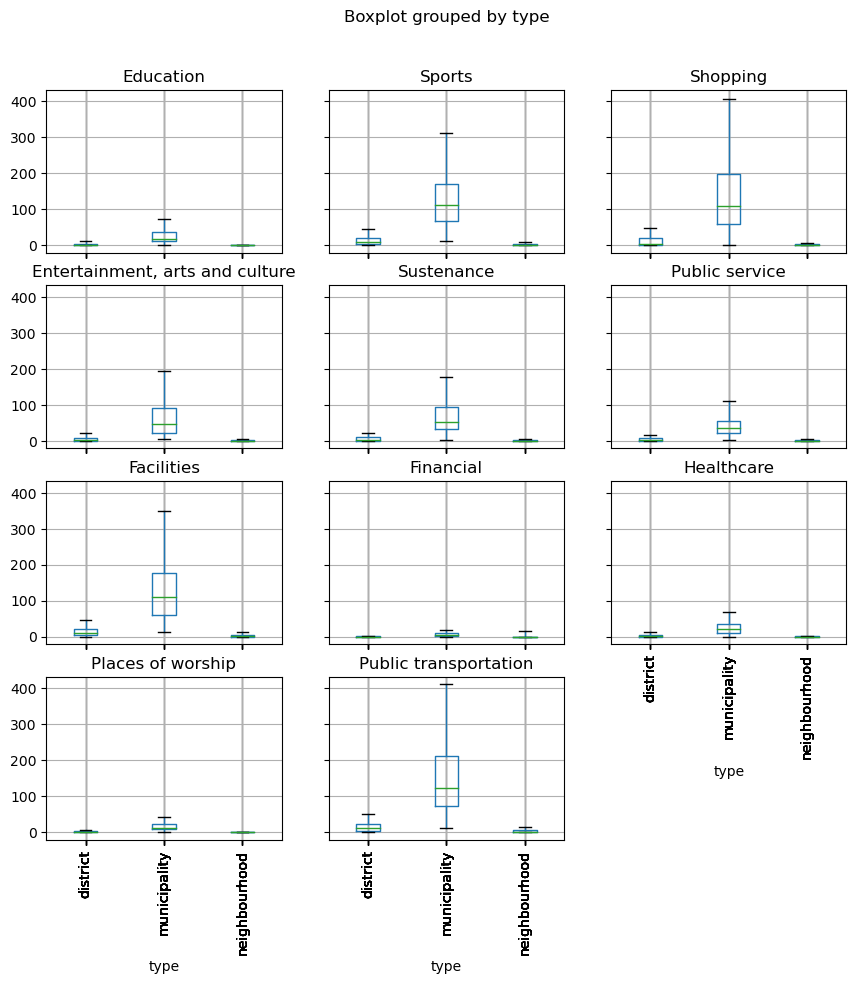

In [448]:

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

df.boxplot(column=cols, by='type', ax=ax, rot=90, showfliers=False, showmeans=False, notch=False,autorange=True)
plt.savefig('plots/boxplots.png', dpi=100)

fig.show()

In [329]:
L0_counts_wk = wk.filter(regex='L0_\d_count_').columns
# L0_counts_wk
countdict = {cat : [] for cat in maincats}
for filter in [0, 1, 2]:
    for col in wk.filter(regex=f"L0_{filter}_count_").columns.values:
        countdict[col.split('_')[-1]].append(wk[col].sum())

for key in countdict.keys():
    if len(countdict[key]) < 3:
        countdict[key].append(0)
    if len(countdict[key]) < 3:
        countdict[key].append(0)
    
import plotly.graph_objects as go
animals=list(countdict.keys())

fig = go.Figure(data=[
    go.Bar(name='2019', x=animals, y=[val[0] for val in countdict.values()]),
    go.Bar(name='2020', x=animals, y=[val[1] for val in countdict.values()]),
    go.Bar(name='2021', x=animals, y=[val[2] for val in countdict.values()])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

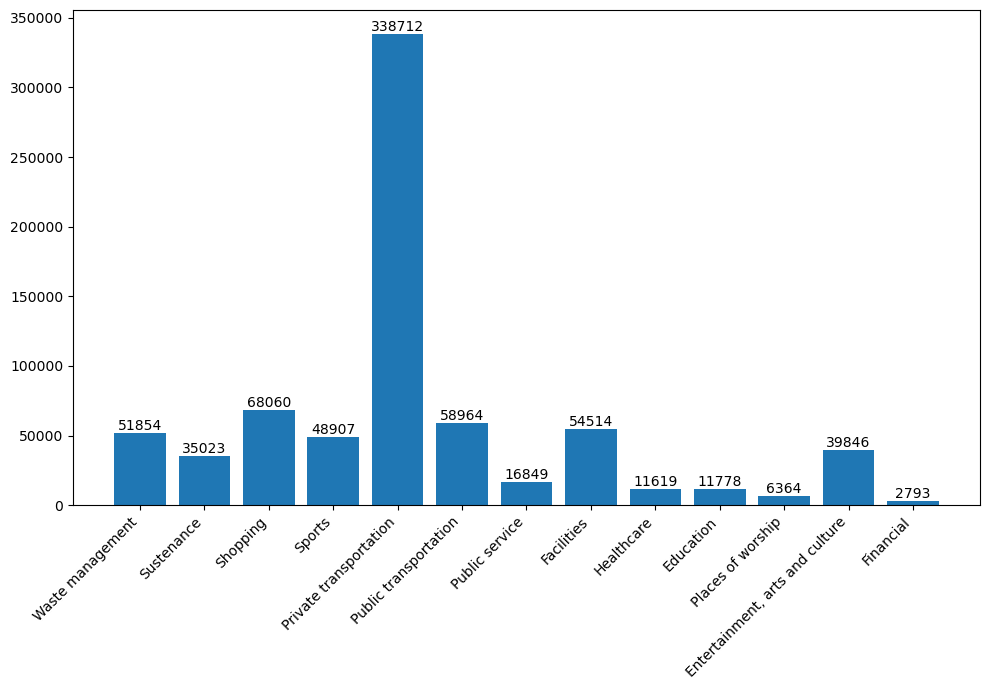

In [379]:
L0_counts_bu = bu.filter(regex='L1_\d_count_').columns
# L0_counts_wk
countdict = {cat : [] for cat in maincats}
for filter in [0]:
    for col in bu.filter(regex=f"L1_{filter}_count_").columns.values:
        countdict[col.split('_')[-1]].append(bu[col].sum())

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(countdict.keys(), [sum(val) for val in countdict.values()])
plt.xticks(rotation=45, ha='right')
ax.bar_label(ax.containers[0])

# use log scale
# plt.yscale('log')
plt.tight_layout()
plt.savefig('plots/amenitydist_all.png', dpi=100)

plt.show()